# Chap08 - 어텐션(Attention)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chap08---어텐션(Attention)" data-toc-modified-id="Chap08---어텐션(Attention)-1">Chap08 - 어텐션(Attention)</a></span><ul class="toc-item"><li><span><a href="#Goals" data-toc-modified-id="Goals-1.1">Goals</a></span></li><li><span><a href="#8.1-어텐션의-구조" data-toc-modified-id="8.1-어텐션의-구조-1.2">8.1 어텐션의 구조</a></span><ul class="toc-item"><li><span><a href="#8.1.1-seq2seq의-문제점" data-toc-modified-id="8.1.1-seq2seq의-문제점-1.2.1">8.1.1 seq2seq의 문제점</a></span></li><li><span><a href="#8.1.2-Encoder-개선" data-toc-modified-id="8.1.2-Encoder-개선-1.2.2">8.1.2 Encoder 개선</a></span></li><li><span><a href="#8.1.3-Decoder-개선-①" data-toc-modified-id="8.1.3-Decoder-개선-①-1.2.3">8.1.3 Decoder 개선 ①</a></span><ul class="toc-item"><li><span><a href="#기존의-seq2seq" data-toc-modified-id="기존의-seq2seq-1.2.3.1">기존의 seq2seq</a></span></li><li><span><a href="#개선된-seq2seq" data-toc-modified-id="개선된-seq2seq-1.2.3.2">개선된 seq2seq</a></span></li><li><span><a href="#맥락-벡터-$\mathbf{c}$를-구하는-과정을-코드로-살펴보기" data-toc-modified-id="맥락-벡터-$\mathbf{c}$를-구하는-과정을-코드로-살펴보기-1.2.3.3">맥락 벡터 $\mathbf{c}$를 구하는 과정을 코드로 살펴보기</a></span></li><li><span><a href="#미니배치-처리용-가중합-구현-샘플-코드" data-toc-modified-id="미니배치-처리용-가중합-구현-샘플-코드-1.2.3.4">미니배치 처리용 가중합 구현 샘플 코드</a></span></li><li><span><a href="#가중합의-계산-그래프" data-toc-modified-id="가중합의-계산-그래프-1.2.3.5">가중합의 계산 그래프</a></span></li><li><span><a href="#가중합(WeightSum)-클래스-구현" data-toc-modified-id="가중합(WeightSum)-클래스-구현-1.2.3.6">가중합(WeightSum) 클래스 구현</a></span></li></ul></li><li><span><a href="#8.1.4-Decoder-개선-②" data-toc-modified-id="8.1.4-Decoder-개선-②-1.2.4">8.1.4 Decoder 개선 ②</a></span><ul class="toc-item"><li><span><a href="#attention-weight-샘플코드" data-toc-modified-id="attention-weight-샘플코드-1.2.4.1">attention weight 샘플코드</a></span></li><li><span><a href="#attention-weight의-계산-그래프" data-toc-modified-id="attention-weight의-계산-그래프-1.2.4.2">attention weight의 계산 그래프</a></span></li><li><span><a href="#AttentionWeight-클래스-구현" data-toc-modified-id="AttentionWeight-클래스-구현-1.2.4.3">AttentionWeight 클래스 구현</a></span></li></ul></li><li><span><a href="#8.1.5-Decoder-개선-③" data-toc-modified-id="8.1.5-Decoder-개선-③-1.2.5">8.1.5 Decoder 개선 ③</a></span><ul class="toc-item"><li><span><a href="#Attention-Layer-구성하기" data-toc-modified-id="Attention-Layer-구성하기-1.2.5.1">Attention Layer 구성하기</a></span></li><li><span><a href="#Attention-레이어가-반영된-seq2seq" data-toc-modified-id="Attention-레이어가-반영된-seq2seq-1.2.5.2">Attention 레이어가 반영된 seq2seq</a></span></li><li><span><a href="#TimeAttention-구현" data-toc-modified-id="TimeAttention-구현-1.2.5.3">TimeAttention 구현</a></span></li></ul></li></ul></li><li><span><a href="#8.2-어텐션을-갖춘-seq2seq-구현" data-toc-modified-id="8.2-어텐션을-갖춘-seq2seq-구현-1.3">8.2 어텐션을 갖춘 seq2seq 구현</a></span><ul class="toc-item"><li><span><a href="#8.2.1-Encoder-구현" data-toc-modified-id="8.2.1-Encoder-구현-1.3.1">8.2.1 Encoder 구현</a></span></li><li><span><a href="#8.2.2-Decoder-구현" data-toc-modified-id="8.2.2-Decoder-구현-1.3.2">8.2.2 Decoder 구현</a></span></li><li><span><a href="#8.2.3-seq2seq-구현" data-toc-modified-id="8.2.3-seq2seq-구현-1.3.3">8.2.3 seq2seq 구현</a></span></li></ul></li><li><span><a href="#8.3-어텐션-평가" data-toc-modified-id="8.3-어텐션-평가-1.4">8.3 어텐션 평가</a></span><ul class="toc-item"><li><span><a href="#8.3.1-날짜-형식-변환-문제" data-toc-modified-id="8.3.1-날짜-형식-변환-문제-1.4.1">8.3.1 날짜 형식 변환 문제</a></span></li><li><span><a href="#8.3.2-어텐션을-갖춘-seq2seq의-학습" data-toc-modified-id="8.3.2-어텐션을-갖춘-seq2seq의-학습-1.4.2">8.3.2 어텐션을 갖춘 seq2seq의 학습</a></span></li><li><span><a href="#8.3.3-어텐션-시각화" data-toc-modified-id="8.3.3-어텐션-시각화-1.4.3">8.3.3 어텐션 시각화</a></span></li></ul></li><li><span><a href="#8.4-어텐션에-관한-남은-이야기" data-toc-modified-id="8.4-어텐션에-관한-남은-이야기-1.5">8.4 어텐션에 관한 남은 이야기</a></span><ul class="toc-item"><li><span><a href="#8.4.1-양방향-RNN" data-toc-modified-id="8.4.1-양방향-RNN-1.5.1">8.4.1 양방향 RNN</a></span><ul class="toc-item"><li><span><a href="#TimeBiLSTM-클래스-구현" data-toc-modified-id="TimeBiLSTM-클래스-구현-1.5.1.1">TimeBiLSTM 클래스 구현</a></span></li></ul></li><li><span><a href="#8.4.2-Attention-레이어-사용-방법" data-toc-modified-id="8.4.2-Attention-레이어-사용-방법-1.5.2">8.4.2 Attention 레이어 사용 방법</a></span></li><li><span><a href="#8.4.3-seq2seq-심층화와-skip-연결" data-toc-modified-id="8.4.3-seq2seq-심층화와-skip-연결-1.5.3">8.4.3 seq2seq 심층화와 skip 연결</a></span></li></ul></li><li><span><a href="#8.5-어텐션-응용" data-toc-modified-id="8.5-어텐션-응용-1.6">8.5 어텐션 응용</a></span><ul class="toc-item"><li><span><a href="#8.5.1-구글-신경망-기계-번역(GNMT)" data-toc-modified-id="8.5.1-구글-신경망-기계-번역(GNMT)-1.6.1">8.5.1 구글 신경망 기계 번역(GNMT)</a></span></li><li><span><a href="#8.5.2-Transformer" data-toc-modified-id="8.5.2-Transformer-1.6.2">8.5.2 Transformer</a></span></li></ul></li><li><span><a href="#8.6-정리" data-toc-modified-id="8.6-정리-1.7">8.6 정리</a></span></li></ul></li></ul></div>

## Goals

- 어텐션이 무엇인가

- 어텐션의 구조를 코드 수준에서 이해

- 실전 문제에 적용해보기

## 8.1 어텐션의 구조

- 어텐션 메커니즘을 사용하여 `seq2seq`에서 필요한 정보에만 **'주목'**할 수 있게 된다.

- 또한, `seq2seq`가 가지고 있던 문제도 해결할 수 있게 된다.

### 8.1.1 seq2seq의 문제점

- `seq2seq`에서는 Encoder가 시계열 데이터를 인코딩하고, 이 인코딩된 정보를 Decoder로 전달한다.

- 이때 Encoder의 출력은 **'고정 길이 벡터'**였는데, 이 부분에 큰 문제점이 있다.

- 고정 길이 벡터는 입력 데이터(문장)의 길이에 관계없이, 항상 **같은** 길이의 벡터로 변환한다.

- 그렇기 때문에, 필요한 정보가 벡터에 다 담기지 못한다.

<img src="./images/fig_8-1.png" width="60%" height="60%" />

### 8.1.2 Encoder 개선

- 기존의 `seq2seq`는 마지막 timestep의 hidden state $\mathbf{h}_{t}$만을 Decoder에 전달했다. 

- 이를 개선하기 위해 Encoder의 <u>출력의 길이를 입력 문장의 길에 맞춰</u> 바꿔주는 것이 좋다.

- 아래의 그림과 같이 Encoder의 LSTM 레이어에서 모든 timestep의 hiddent state 벡터를 사용한다.

- 각 timestep(각 단어)의 hidden state를 모두 이용하면 입력된 단어와 같은 수의 벡터를 얻을 수 있다. → '하나의 고정 길이 벡터'라는 제약으로부터 해방!

> 대붑분의 딥러닝 프레임워크에서는 RNN 계열의 레이어를 초기화할 때, 
> - 모든 timestep에 대한 hidden state `return`
> - 마지막 timestep에서만 hidden state `return`
> 을 설정할 수 있다. [Keras](https://keras.io/layers/recurrent/)에서는 `return_sequences=True`를 통해 모든 timestep의 hidden state를 반환 받을 수 있다.

<img src="./images/fig_8-2.png" width="60%" height="60%" />

- 위의 그림에서 주목해야할 부분은 LSTM레이어가 각 timestep마다 출력한 hidden state의 **'내용'**이다.

- 각 timestep $t$의 hidden state $\mathbf{h}_{t}$에는 해당 timestep $t$에 입력된 단어의 정보가 많이 포함되어 있다.

- Encoder가 출력하는 $\mathbf{hs}$행렬은 아래의 그림과 같이 각 단어에 해당하는 벡터들의 집합으로 볼 수 있다.

> 예를들어, 위의 그림에서처럼 $t=3$에서 "고양이"라는 단어를 입력했을 때, $\mathbf{h}_{3}$은 "고양이"라는 단어의 영향을 가장 크게 받는다. 따라서, $\mathbf{h}_{3}$은 "고양이"라는 단어의 *성분*이 많이 들어간 벡터라고 할 수 있다. 

<img src="./images/fig_8-3.png" width="60%" height="60%" />

### 8.1.3 Decoder 개선 ①

- Decoder는 아래의 그림과 같이 Encoder의 출력인 $\mathbf{hs}$를 입력으로 받아 시계열 데이터로 변환하는 작업을 한다.

<img src="./images/fig_8-4.png" width="40%" height="40%" />

#### 기존의 seq2seq

- 기존의 `seq2seq`는 Encoder에서 마지막 timestep의 hidden state만을 Decoder의 입력으로 사용했다. 

- 즉, Encoder의 LSTM 레이어의 **'마지막'** hidden state를 Decoder의 LSTM 레이어의 **'첫'** hidden state로 설정한 것이다.

<img src="./images/fig_8-5.png" width="70%" height="70%" />

#### 개선된 seq2seq

- 기존의 `seq2seq`에서와는 달리 각 timestep $t$마다 hidden state의 행렬인 $\mathbf{hs}$ 전부를 활용할 수 있도록 Decoder를 개선한다.

> 사람이 문장을 번역할 때,
> - *'나 = I', '고양이 = cat'* 이라는 것과 같이 '어떤 단어'에 주목하여 그 단어의 변환을 대응시킬 수 있다. 
> - 이러한 단어(혹은 문구)의 대응 관계를 나타내는 정보를 **얼라인먼트(alignment)**라 한다.
> - 기존의 alignment는 사람이 수작업을 통해 구축했다면, Attention 매커니즘을 통해 alignment를 자동으로 구축할 수 있다.

- 따라서, 필요한 정보에만 주목하여 그 정보로부터 시계열 변환을 수행하는 것이 Decoder의 목표이며, 이러한 구조를 Attention이라 한다.

- 구현하고자 하는 개선된 Decoder의 전체 틀은 아래의 그림과 같다.

<img src="./images/fig_8-6.png" width="70%" height="70%" />

- 위의 그림에서 ***'어떤 계산'***이 받는 입력은 두 가지로,
    - 하나는 Encoder로 부터 받는 $\mathbf{hs}$(각 timestep $t$의 hiddent state의 행렬)
    - 다른 하나는 Decoder에서 각 timestep별 LSTM의 hidden state 이다.

- 그런다음 필요한 정보만 골라 위쪽의 Affine 레이어의 입력으로 집어 넣는다. 

- 위의 그림과 같이, 개선된 seq2seq의 Decoder에서 하고자 하는 것은 단어들의 alignment 추출이다.
    - Decoder에서 출력된 단어와 대응관계인 단어의 벡터를 $\mathbf{hs}$에서 찾는다는 의미
    - 예를 들어, Decoder가 "I"를 출력할 때, $\mathbf{hs}$에서 "나"에 대응하는 벡터를 선택
    
    
- 이러한 **'선택'** 작업을 **'어떤 계산'**으로 수행하겠다는 것이 Attention의 목표이다.

- 하지만, 이러한 *'선택'* 작업은 미분을 할 수 없으며, <u>미분이 불가능 하다</u>는 것은 backpropagtion을 통해 **학습을 시킬 수 없다**는 것을 의미한다.

- 이를 미분 가능한 연산으로 대체하기 위한 방법으로는 '하나를 선택'하는 것이 아니라, **'모든 것을 선택'**하는 것이다.

- 그리고 이때, 아래의 그림과 같이 각 단어의 **중요도(기여도)**를 나타내는 *'가중치'* 를 별도로 계산한다.

<img src="./images/fig_8-7.png" width="70%" height="70%" />

- 위의 그림에서 각 단어의 중요도를 나타내는 '가중치' $\mathbf{a}$를 이용한다. 

- $\mathbf{a}$는 확률분포처럼 각 원소가 0.0 ~ 1.0 사이의 스칼라이며, 모든 원소의 총합은 1이 된다.

- 그런 다음, 각 단어의 중요도를 나타내는 가중치 $\mathbf{a}$와 각 단어의 벡터 $\mathbf{hs}$로부터 가중합(weighted sum)을 구하여, Attention의 출력값, **맥락 벡터** $\mathbf{c}$를 얻는다.

> 맥락 벡터 $\mathbf{c}$에는 현 시각(timestep)의 변환을 수행하는 데 필요한 정보가 담겨있으며, 이를 데이터로 부터 학습되게 한다.

<img src="./images/fig_8-8.png" width="70%" height="70%" />

#### 맥락 벡터 $\mathbf{c}$를 구하는 과정을 코드로 살펴보기

In [1]:
import numpy as np


T, H = 5, 4
hs = np.random.randn(T, H)  # Encoder의 output인 hs 랜덤하게 생성
a = np.array([0.8, 0.1, 0.03, 0.05, 0.02])  # attention distribution

ar = a.reshape(5, 1).repeat(4, axis=1)
# ar = a.reshape(5, 1)  # numpy broadcasting 사용

In [3]:
ar.shape

(5, 4)

In [2]:
ar

array([[0.8 , 0.8 , 0.8 , 0.8 ],
       [0.1 , 0.1 , 0.1 , 0.1 ],
       [0.03, 0.03, 0.03, 0.03],
       [0.05, 0.05, 0.05, 0.05],
       [0.02, 0.02, 0.02, 0.02]])

In [4]:
hs

array([[ 0.16302473,  1.02837243, -0.52674608, -0.48577415],
       [-0.12523668, -0.63852466,  0.32367023, -2.0770472 ],
       [ 0.72124699,  1.21389829, -0.74714707,  0.24942445],
       [-1.29325626,  1.34291003,  2.05012806, -0.75353779],
       [ 2.50445953, -0.15788155, -0.31239195, -1.48325245]])

In [6]:
t = hs * ar  # point-wise dot
t.shape

(5, 4)

In [9]:
c = np.sum(t, axis=0)  # 맥락 벡터 c
c.shape

(4,)

In [10]:
c

array([ 0.12495991,  0.8592503 , -0.31518569, -0.65618325])

#### 미니배치 처리용 가중합 구현 샘플 코드

In [11]:
import numpy as np


N, T, H = 10, 5, 4
hs = np.random.randn(N, T, H)
a = np.random.randn(N, T)
ar = a.reshape(N, T, 1).repeat(H, axis=-1)
# ar = a.reshape(N, T, 1)  # 브로드캐스트를 사용하는 경우

t = hs * ar
print(t.shape)

(10, 5, 4)


In [12]:
c = np.sum(t, axis=1)
print(c.shape)

(10, 4)


#### 가중합의 계산 그래프

1. `Repeat`노드를 사용해 $\mathbf{a}$를 복제하고, 

2. 이어서 `x` 노드로 원소별 곱을 계산한 다음

3. `Sum`노드로 합을 구한다.

<img src="./images/fig_8-11.png" width="40%" height="40%" />

#### 가중합(WeightSum) 클래스 구현

In [2]:
import sys
sys.path.append('..')
from common.np import *
from common.layers import Softmax


class WeightSum:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        
    def forward(self, hs, a):
        N, T, H = hs.shape
        
        ar= a.reshape(N, T, 1)#.repeat(H, axis=-1)
        t = hs * ar
        c = np.sum(t, axis=1)
        
        self.cache = (hs, ar)
        return c
    
    def backward(self, dc):
        hs, ar = self.cache
        N, T, H = hs.shape
        dt = dc.reshape(N, 1, H).repeat(T, axis=1)  # sum의 역전파 = repeat
        dar = dt * hs
        dhs = dt * ar
        da = np.sum(dar, axis=2)  # repeat노드에 대한 역전퍄 = sum
        
        return dhs, da

### 8.1.4 Decoder 개선 ②

- 각 단어의 가중치 $\mathbf{a}$를 구하는 방법을 살표보자. 

- 아래의 그림은 Decoder의 첫 번째 timestep에서의 LSTM 레이어가 hidden state를 출력하는 부분을 나타낸 것이다.

<img src="./images/fig_8-12.png" width="60%" height="60%" />

- 위의 그림에서 Encoder에서의 출력을 $\mathbf{h}_{s}$라 하고, Decoder의 LSTM의 출력(hidden state)을 $\mathbf{h}_{t}$라고 정의 했다.

- Attention의 목표는 $\mathbf{h}_{t}$가 $\mathbf{h}_{s}$의 각 단어 벡터와 얼마나 '비슷한가'를 수치로 나타내는 것이다. 

- 이를 나타내는 방법으로는 대표적으로 다음과 같이 3가지가 주로 사용된다.
    - Basic dot-product attention: $\mathbf{e}_{i} = \mathbf{h}_{t}^{\mathsf{T}} \mathbf{h}_{s}$
    - Multiplicative attention: $\mathbf{e}_{i} = \mathbf{h}_{t}^{\mathsf{T}} \mathbf{W} \mathbf{h}_{s}$
    - Additive attention: $\mathbf{e}_{i} = v^{\mathsf{T}} \tanh{\left(\mathbf{W}_{t} \mathbf{h}_{t} + \mathbf{W}_{s}\mathbf{h}_{s}\right)}$

- 교재에서는 가장 단순한 방법인 벡터의 '내적'을 이용한다. 두 벡터 $\mathbf{a} = (a_1, a_2, \cdots, a_n)$과 $\mathbf{b} = (b_1, b_2, \cdots, b_n)$의 내적은 다음과 같이 계산한다.

$$
\mathbf{a} \cdot \mathbf{b} = a_1b_1 + a_2b_2 + \cdots + a_nb_n
$$

- '내적'의 직관적인 의미는 '두 벡터가 얼마나 같은 방향을 향하고 있는가'이다. 따라서, 두 벡터의 '유사도'를 표현하는 척도로 사용할 수 있다.

- 아래의 그림은 벡터의 내적을 이용해 유사도를 산출해내는 과정이다.

<img src="./images/fig_8-13.png" width="70%" height="70%" />

#### attention weight 샘플코드

In [4]:
import sys
sys.path.append('..')
from common.layers import Softmax
import numpy as np


N, T, H = 10, 5, 4
hs = np.random.randn(N, T, H)  # encoder output
h = np.random.randn(N, H)  # decoder h_t
hr = h.reshape(N, 1, H).repeat(T, axis=1)  # hs와 h_t의 point-wise dot을 위한 처리

t = hs * hr  # point-wise dot
print(f't.shape : {t.shape}')

s = np.sum(t, axis=-1)
print(f's.shape : {s.shape}')

softmax = Softmax()
a = softmax.forward(s)
print(f'a.shape : {a.shape}')

t.shape : (10, 5, 4)
s.shape : (10, 5)
a.shape : (10, 5)


#### attention weight의 계산 그래프

<img src="./images/fig_8-15.png" width="40%" height="40%" />

#### AttentionWeight 클래스 구현

In [6]:
# chap08/attention_layer.py
import sys
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Softmax


class AttentionWeight:
    def __init__(self):
        self.params, self.grads = [], []
        self.softmax = Softmax()
        self.cache = None
        
    def forward(self, hs, h):
        N, T, H = hs.shape

        hr = h.reshape(N, 1, H)#.repeat(T, axis=1)
        t = hs * hr
        s = np.sum(t, axis=2)
        a = self.softmax.forward(s)

        self.cache = (hs, hr)
        return a

    def backward(self, da):
        hs, hr = self.cache
        N, T, H = hs.shape

        ds = self.softmax.backward(da)
        dt = ds.reshape(N, T, 1).repeat(H, axis=2)
        dhs = dt * hr
        dhr = dt * hs
        dh = np.sum(dhr, axis=1)

        return dhs, dh

### 8.1.5 Decoder 개선 ③

#### Attention Layer 구성하기

<img src="./images/fig_8-17.png" width="70%" height="70%" />

In [7]:
# chap08/attention_layer.py
import sys
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Softmax


class Attention:
    def __init__(self):
        self.params, self.grads = [], []
        self.attention_weight_layer = AttentionWeight()
        self.weight_sum_layer = WeightSum()
        self.attention_weight = None

    def forward(self, hs, h):
        a = self.attention_weight_layer.forward(hs, h)
        out = self.weight_sum_layer.forward(hs, a)
        self.attention_weight = a
        return out

    def backward(self, dout):
        dhs0, da = self.weight_sum_layer.backward(dout)
        dhs1, dh = self.attention_weight_layer.backward(da)
        dhs = dhs0 + dhs1
        return dhs, dh

#### Attention 레이어가 반영된 seq2seq

<img src="./images/fig_8-18.png" width="70%" height="70%" />

- 위의 그림에서 각 timestep $t$의 `Attention`레이어에는 `Encoder`의 출력인 $\mathbf{hs}$가 입력된다. 

- 그리고, Decoder에서 LSTM레이어의 hidden state $\mathbf{h}_{t}$ 벡터를 `Affine` 레이어에 context 벡터와 concat하여 입력한다.

#### TimeAttention 구현

<img src="./images/fig_8-20.png" width="60%" height="60%" />

In [8]:
class TimeAttention:
    def __init__(self):
        self.params, self.grads = [], []
        self.layers = None
        self.attention_weights = None

    def forward(self, hs_enc, hs_dec):
        N, T, H = hs_dec.shape
        out = np.empty_like(hs_dec)
        self.layers = []
        self.attention_weights = []

        for t in range(T):
            layer = Attention()
            out[:, t, :] = layer.forward(hs_enc, hs_dec[:,t,:])
            self.layers.append(layer)
            self.attention_weights.append(layer.attention_weight)

        return out

    def backward(self, dout):
        N, T, H = dout.shape
        dhs_enc = 0
        dhs_dec = np.empty_like(dout)

        for t in range(T):
            layer = self.layers[t]
            dhs, dh = layer.backward(dout[:, t, :])
            dhs_enc += dhs
            dhs_dec[:,t,:] = dh

        return dhs_enc, dhs_dec

## 8.2 어텐션을 갖춘 seq2seq 구현

### 8.2.1 Encoder 구현

In [10]:
# chap08/attention_seq2seq.py
import sys
sys.path.append('..')
from common.time_layers import *
from seq2seq import Encoder, Seq2seq
from attention_layer import TimeAttention


class AttentionEncoder(Encoder):
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        return hs

    def backward(self, dhs):
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

### 8.2.2 Decoder 구현

<img src="./images/fig_8-21.png" width="50%" height="50%" />

In [11]:
class AttentionDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(2*H, V) / np.sqrt(2*H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.attention = TimeAttention()  # Attention 레이어 
        self.affine = TimeAffine(affine_W, affine_b)
        layers = [self.embed, self.lstm, self.attention, self.affine]

        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, enc_hs):
        h = enc_hs[:,-1]
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        dec_hs = self.lstm.forward(out)
        c = self.attention.forward(enc_hs, dec_hs)  # context vector
        out = np.concatenate((c, dec_hs), axis=2)  # context_vector & lstm h_t
        score = self.affine.forward(out)

        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        N, T, H2 = dout.shape
        H = H2 // 2

        dc, ddec_hs0 = dout[:,:,:H], dout[:,:,H:]
        denc_hs, ddec_hs1 = self.attention.backward(dc)
        ddec_hs = ddec_hs0 + ddec_hs1
        dout = self.lstm.backward(ddec_hs)
        dh = self.lstm.dh
        denc_hs[:, -1] += dh
        self.embed.backward(dout)

        return denc_hs

    def generate(self, enc_hs, start_id, sample_size):
        sampled = []
        sample_id = start_id
        h = enc_hs[:, -1]
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array([sample_id]).reshape((1, 1))

            out = self.embed.forward(x)
            dec_hs = self.lstm.forward(out)
            c = self.attention.forward(enc_hs, dec_hs)
            out = np.concatenate((c, dec_hs), axis=2)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(sample_id)

        return sampled

### 8.2.3 seq2seq 구현

In [12]:
class AttentionSeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        args = vocab_size, wordvec_size, hidden_size
        self.encoder = AttentionEncoder(*args)
        self.decoder = AttentionDecoder(*args)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

## 8.3 어텐션 평가

### 8.3.1 날짜 형식 변환 문제

<img src="./images/fig_8-22.png" width="50%" height="50%" />

### 8.3.2 어텐션을 갖춘 seq2seq의 학습

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 151 / 351 | 시간 87[s] | 손실 1.62
| 에폭 1 |  반복 301 / 351 | 시간 175[s] | 손실 1.02
Q 10/15/94                     
T 1994-10-15
X 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
X 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
X 1978-08-11
---
Q Tuesday, November 22, 2016   
T 2016-11-22
X 1978-08-11
---
Q Saturday, July 18, 1970      
T 1970-07-18
X 1978-08-11
---
Q october 6, 1992              
T 1992-10-06
X 1978-08-11
---
Q 8/23/08                      
T 2008-08-23
X 1978-08-11
---
Q 8/30/07                      
T 2007-08-30
X 1978-08-11
---
Q 10/28/13                     
T 2013-10-28
X 1978-08-11
---
Q sunday, november 6, 2016     
T 2016-11-06
X 1978-08-11
---
정확도 0.000%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.00
| 에폭 2 |  반복 151 / 351 | 시간 85[s] | 손실 0.99
| 에폭 2 |  반복 301 / 351 | 시간 170[s] | 손실 0.86
Q 10/15/94                     
T 1994-10-15
O 1994-10-15
---
Q thursday, november 13, 2008  
T 2008-11-13
X 

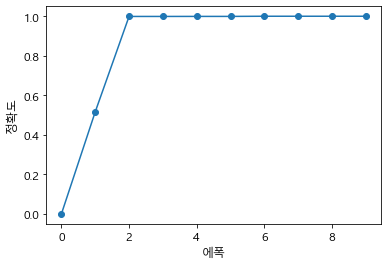

In [3]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad, eval_interval=150)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()

### 8.3.3 어텐션 시각화

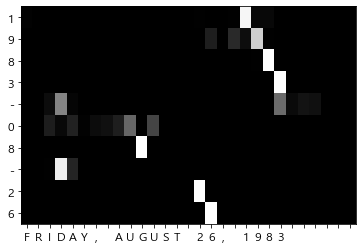

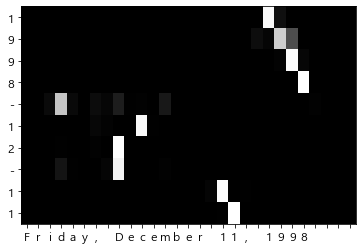

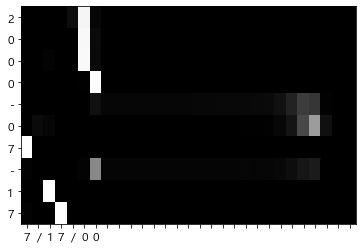

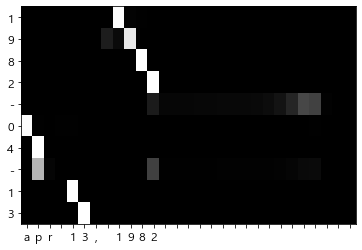

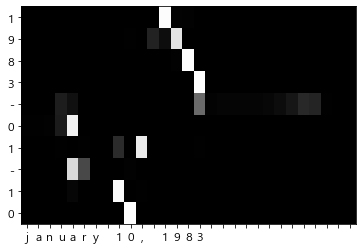

In [4]:
import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)

from attention_seq2seq import AttentionSeq2seq


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params()

_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()


np.random.seed(1984)
for _ in range(5):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    # 출력하기 위해 반전
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)

## 8.4 어텐션에 관한 남은 이야기

### 8.4.1 양방향 RNN

<img src="./images/fig_8-30.png" width="60%" height="60%" />

- Bidirectional RNN(LSTM, GRU 등)에서는 정방향 LSTM 레이어에 *역방향* 으로 처리하는 LSTM 레이어를 추가한 형태를 말한다.

- 그리고, 각 timestep $t$에서 정방향 & 역방향 LSTM의 hidden state $\mathbf{h}_{t}$를 연결(concat, 또는 sum, average 등)시킨 벡터를 최종 $\mathbf{h}_{t}$로 만든다.

- 양방향으로 처리함으로써, 각 단어에 대응하는 hidden state 벡터에는 forward, backward 방양으로부터의 정보를 집약할 수 있다.

#### TimeBiLSTM 클래스 구현

In [5]:
# common/time_layers.py

class TimeBiLSTM:
    def __init__(self, Wx1, Wh1, b1,
                 Wx2, Wh2, b2, stateful=False):
        self.forward_lstm = TimeLSTM(Wx1, Wh1, b1, stateful)
        self.backward_lstm = TimeLSTM(Wx2, Wh2, b2, stateful)
        self.params = self.forward_lstm.params + self.backward_lstm.params
        self.grads = self.forward_lstm.grads + self.backward_lstm.grads

    def forward(self, xs):
        o1 = self.forward_lstm.forward(xs)
        o2 = self.backward_lstm.forward(xs[:, ::-1])  # backward를 위해 입력데이터 반전
        o2 = o2[:, ::-1]

        out = np.concatenate((o1, o2), axis=2)  # forward, backward concat
        return out

    def backward(self, dhs):
        H = dhs.shape[2] // 2
        do1 = dhs[:, :, :H]
        do2 = dhs[:, :, H:]

        dxs1 = self.forward_lstm.backward(do1)
        do2 = do2[:, ::-1]
        dxs2 = self.backward_lstm.backward(do2)
        dxs2 = dxs2[:, ::-1]
        dxs = dxs1 + dxs2
        return dxs

### 8.4.2 Attention 레이어 사용 방법

- Attention 레이어는 다양하게 조합되어 사용할 수 있다. 

- 다만, Attention 레이어를 조합하였을 때, 정확도에 대한 영향은 직접 데이터를 사용해 검증해보지 않으면 모른다. 

- 아래의 그림(출처: [CN Yah 블로그](http://cnyah.com/2017/08/01/attention-variants/))과 같이 Bahdanau Attention 메커니즘의 경우에는 LSTM 레이어가 context 벡터의 정보를 이용할 수 있도록 구성하였다.

<img src="./images/attention-mechanisms.png" width="65%" height="65%" />

### 8.4.3 seq2seq 심층화와 skip 연결

- 번역 등 현실에서의 애플리케이션들은 풀어야 할 문제가 훨씬 복잡하다.

- 이럴 경우에 층을 깊게 쌓은 seq2seq를 사용할 수 있다.

<img src="./images/fig_8-33.png" width="65%" height="65%" />

- 층을 깊게 쌓을 때 사용되는 중요한 기법 중에 **skip connection**이 있다(residual connection 또는 short-cut).

- skip connection에서는 2개의 출력이 하나로 **'더해'**지기 때문에 역전파 시 기울기가 **'그대로 흘려'** 보낸다.

- 따라서, 층이 깊어져도 기울기 소실(또는 폭발)이 되지 않고 전파되어, 좋은 학습을 기대할 수 있다.

<img src="./images/fig_8-34.png" width="65%" height="65%" />

## 8.5 어텐션 응용

### 8.5.1 구글 신경망 기계 번역(GNMT)

<img src="./images/fig_8-35.png" width="65%" height="65%" />

### 8.5.2 Transformer

<img src="./images/transformer.png" width="65%" height="65%" />

## 8.6 정리

- 어텐션은 두 시계열 데이터 사이의 대응 관계를 데이터로부터 학습한다.

- 어텐션에서는 벡터의 내적을 사용해 벡터 사이의 유사도를 구하고, 그 유사도를 이용한 가중합 벡터가 어텐션의 출력이 된다.

- 어텐션에서 사용하는 연산은 미분 가능하기 때문에 오차역전파법으로 학습할 수 있다.

- 어텐션이 산출하는 가중치(확률)을 시각화하면 입출력의 대응 관계를 볼 수 있다.